## Import Package

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

## Load Dataset

In [ ]:
url = 'https://raw.githubusercontent.com/pararawendy/dibimbing-materials/main/boston.csv'
boston = pd.read_csv(url)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston.shape

(506, 14)

In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Data Preprocessing (20 point)

1. lakukan data preprocessing termasuk kecuali melakukan reduksi dimensi

### Missing Value

In [ ]:
#check missing value
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No missing value

### Duplicated


In [ ]:
#check duplicated
boston.duplicated().sum()

0

No duplicated value

### Checking Outlier

In [ ]:
features  = list(boston)[:-1]
features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

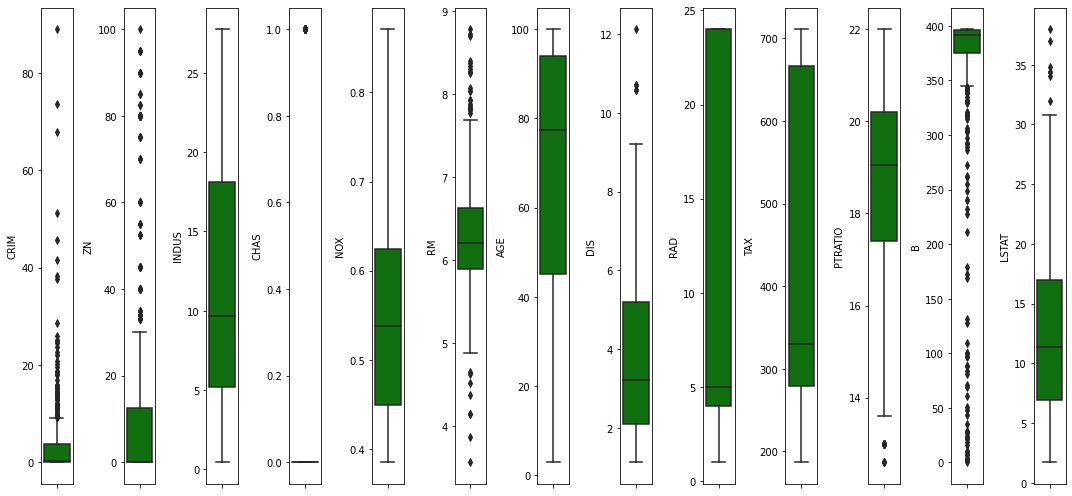

In [ ]:
#create boxplot to show if there're outliers
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 13, i+1)
    sns.boxplot(y=features[i],data=boston,color='green')
    plt.tight_layout()

**Observation:** There are many outliers, but we can just ignore them since we're going to use `PCA` to reduce dimensionality of data. The model works best if the data itself is not too clean.

### PCA Process (40)

1. lakukan data preprocessing termasuk melakukan reduksi dimensi dengan PCA (analisis berapa penggunaan PC yang tepat)

In [ ]:
#split feature and target for PCA
feats = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = boston.drop('Mmedv', axis=1)
y = boston[['medv']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [ ]:
new_boston = pd.DataFrame(data=X_std, columns = feats)
new_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [ ]:
#do initial pca preprocessing
from sklearn.decomposition import PCA

pca = PCA(n_components=13)
pca.fit(X_std)
pcs = pca.transform(X_std)

X_std = pd.DataFrame(data=pcs, 
                   columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 
                            'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13'])
X_std['medv'] = y
X_std.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,medv
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832,-0.424937,0.640206,-0.033000,0.019440,0.365975,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670,-0.166962,0.084236,-0.640810,-0.125797,-0.070719,21.6
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166,0.069775,-0.180380,-0.487557,0.133327,-0.014022,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941,-0.342246,0.045901,-0.360209,0.508678,0.007847,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524,-0.417668,-0.140880,-0.395150,0.497732,0.014274,36.2


In [ ]:
print('Explained variance ratio:', pca.explained_variance_ratio_*100)

Explained variance ratio: [47.12960636 11.02519325  9.55858979  6.5967316   6.42166105  5.05697827
  4.11812374  3.04690242  2.13033331  1.69413711  1.43087975  1.30233058
  0.48853277]


**Interpretation:**

*   pc1 = 47% informasi original dan ada loss 53%
*   pc2 = 58% informasi original dan ada loss 42%
*   pc3 = 67.5% informasi original dan ada loss 32.5%
*   pc4 = 74% informasi original dan ada loss 26%
*   pc5 = 80.4% informasi original dan ada loss 20.6%
*   pc6 = 85.4% informasi original dan ada loss 14.6%

karena pc5 udah bisa mewakili **80% data**, maka yang dipilih adalah **pc5**




### Skree Plot (optional)

<BarContainer object of 13 artists>

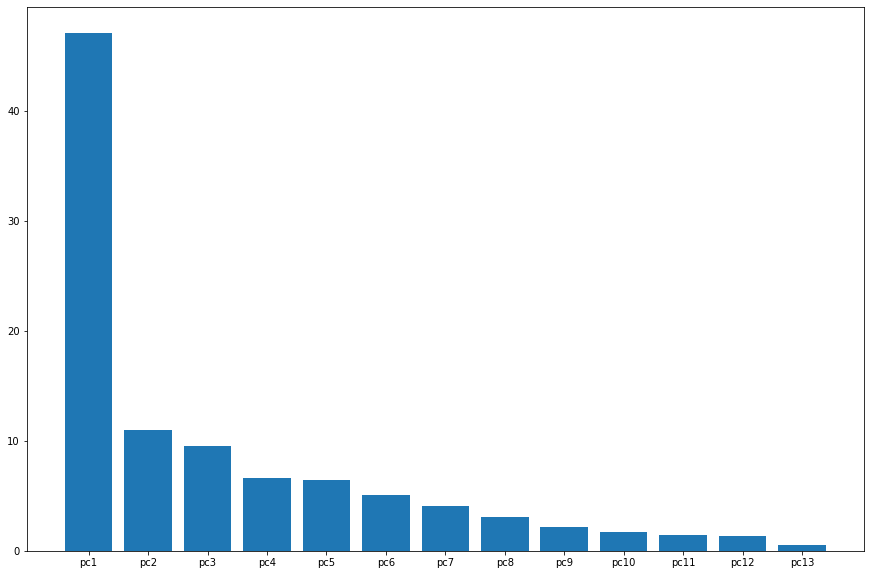

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 
        'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13'], pca.explained_variance_ratio_ * 100)

**Observation**: Berdasarkan visualisasi barplot di atas, kita bisa menyimpulkan bahwa betul 5 features saja sudah cukup untuk mewakili 80% data original

### Reduksi Feature

In [ ]:
#do pca processing again with differen n components
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X_std)
pcs = pca.transform(X_std)

X_std_pca = pd.DataFrame(data=pcs, 
                   columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
X_std_pca['medv'] = y
X_std_pca.head()

,pc1,pc2,pc3,pc4,pc5,medv
0,1.845535,-1.551202,-0.584961,0.468786,-1.034530,24.0
1,-0.678811,-1.536564,-0.904741,-0.352770,-0.339735,21.6
2,12.368260,0.000146,-0.301916,-0.844818,-0.201577,34.7
3,11.142806,-0.863549,0.062134,-0.993449,0.240220,33.4
4,13.873304,-0.304976,0.026910,-1.075854,0.157038,36.2


## Regression Model (20 point)

bebas menggunakan model apapun

### Sampling data set

In [ ]:
#split data original
from sklearn.model_selection import train_test_split

X_ori = X_std.drop('medv', axis=1)
y_ori = X_std['medv']

X_train, X_test, y_train, y_test = train_test_split(X_ori,
                                                    y_ori,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
#split data after PCA preprocessing

X_pca = X_std_pca.drop('medv', axis=1)
y_pca = X_std_pca['medv']

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,
                                                                    y_pca,
                                                                    test_size=0.2,
                                                                    random_state = 42)

### Modelling with PCA

In [ ]:
# define the model
reg_pca = LinearRegression()

# train the model
X_bostonpca_train = X_train_pca.to_numpy()
y_bostonpca_train = y_train_pca.to_numpy()
y_bostonpca_train = y_bostonpca_train.reshape(len(y_bostonpca_train,))

reg_pca.fit(X_bostonpca_train, y_bostonpca_train)

LinearRegression()

#### Model Diagnostic

In [ ]:
# retrieve the coefficients
# show as a nice dataframe

data = X_train_pca
model_pca = reg_pca

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model_pca.intercept_] + list(model_pca.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.530468
1,pc1,0.983318
2,pc2,0.141110
3,pc3,0.012615
4,pc4,-0.042631
5,pc5,0.004625


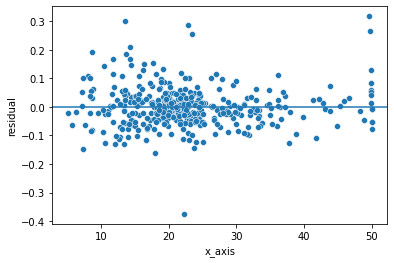

In [ ]:
# calculate residuals
y_predict_bostonpca = reg_pca.predict(X_bostonpca_train)
residual = y_bostonpca_train - y_predict_bostonpca

# prepare dataframe
# >1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_bostonpca,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()

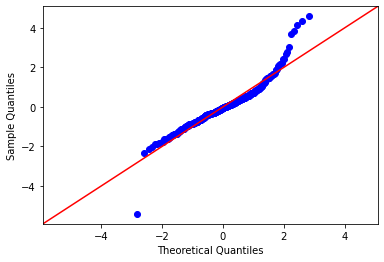

In [ ]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

### Modelling without PCA

In [ ]:
# define the model
reg_ori = LinearRegression()

# train the model
X_boston_train = X_train.to_numpy()
y_boston_train = y_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train,))

reg_ori.fit(X_boston_train, y_boston_train)

LinearRegression()

#### Model Diagnostic

In [ ]:
# retrieve the coefficients
# show as a nice dataframe

data = X_train
model = reg_ori

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.485268
1,pc1,-2.307697
2,pc2,2.422270
3,pc3,3.463733
4,pc4,-1.137239
5,pc5,-2.587710
6,pc6,-0.719462
7,pc7,-0.088801
8,pc8,1.097525
9,pc9,0.227430


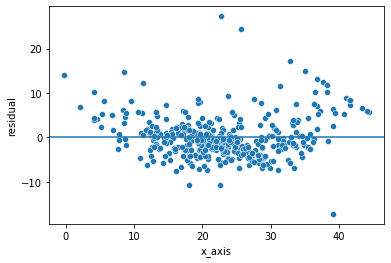

In [ ]:
# calculate residuals
y_predict_boston = reg_ori.predict(X_boston_train)
residual_ori = y_boston_train - y_predict_boston

# prepare dataframe
# >1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_boston,
    'residual': residual_ori
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()

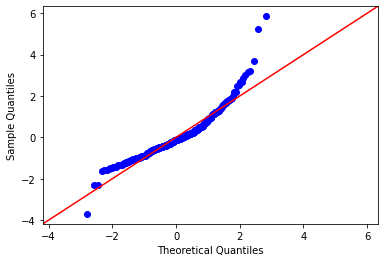

In [ ]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual_ori.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

**Observation:** Jika dibandingkan, model regresi linear yang tanpa reduksi feature terbukti memiliki lebih banyak residualnya daripada model regresi yang sudah direduksi sebagian featurenya.

### Predicting

(on test data)

In [ ]:
#predict pca model on test data
X_bostonpca_test = X_test_pca.to_numpy()
y_pred_pca = model_pca.predict(X_bostonpca_test)

# ground truth target
y_bostonpca_test = y_test_pca.to_numpy()
y_bostonpca_test = y_bostonpca_test.reshape(len(y_bostonpca_test),)

In [ ]:
#predict original regression model on test data
X_boston_test = X_test.to_numpy()
y_pred = model.predict(X_boston_test)

# ground truth target
y_boston_test = y_test.to_numpy()
y_boston_test = y_boston_test.reshape(len(y_boston_test),)

## Evaluasi (20)

Bandingkan hasil menggunakan PCA dan tidak menggunakan PCA

#### Model Evaluation with PCA

##### Training Error

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('R-squared for training data is {}'.format(r2_score(y_train_pca, y_predict_bostonpca)*100))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train_pca, y_predict_bostonpca))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train_pca, y_predict_bostonpca)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train_pca, y_predict_bostonpca)*100))

R-squared for training data is 99.99446072855473
RMSE for training data is 0.0693696882799383
MAE for training data is 0.048759734776246504
MAPE for training data is 0.26837947925193406


**Interpretation:**


1.   99,9% of variability of `medv` is successfully explained using all the features in the model
2.   RMSE only 0,07 which means VERY GOOD

##### Testing Error

In [ ]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test_pca, y_pred_pca)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test_pca, y_pred_pca)*100))

RMSE for testing data is 0.08109401881653645
MAE for testing data is 0.05427208848308816
MAPE for testing data is 0.3200822348851443


**Interpretation:**
1. **Our prediction model on training data** deviates the true `medv` only by 0.048 (MAE) or 0,26% (MAPE), meaning our model is 'VERY GOOD' and NOT UNDERFITTING. (threshold MAPE <= 30%)
2. **Our prediction model on testing data** is also 'VERY GOOD' since it only deviates 0,32% (MAPE) relative to the true `medv`
3. MAPE on `testing error = 0,32%` > `training error=0,26%`, but the difference is not that far, so the model is NOT OVERFITTING
3. In conclusion, our model is **REASONABLE**

#### Model Evaluation without PCA

##### Training Error

In [ ]:
print('R-squared for training data is {}'.format(r2_score(y_train, y_predict_boston)*100))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_boston))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, y_predict_boston)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_boston)*100))

R-squared for training data is 75.08856358979673
RMSE for training data is 4.6520331848801675
MAE for training data is 3.31477162678323
MAPE for training data is 16.574914349533984


**Interpretation:**


1.   75,08% of variability of `medv` is successfully explained using all the features in the model
2.   RMSE only 4,65 which means GOOD


##### Testing Error

In [ ]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_pred)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_pred)*100))

RMSE for testing data is 4.928602182665334
MAE for testing data is 3.1890919658878527
MAPE for testing data is 16.86639453937874


**Interpretation:**

1. **Our prediction model on training data** deviates the true `medv` only by 3.31 (MAE) or 16,5% (MAPE), meaning our model is quite 'GOOD' and NOT UNDERFITTING. (threshold MAPE <= 30%)
2. **Our prediction model on testing data** is also 'VERY GOOD' since it only deviates 16,8% (MAPE) relative to the true `medv`
3. MAPE on `testing error = 16,8%` > `training error= 16,5%`, but the difference is not that far, so the model is NOT OVERFITTING
3. In conclusion, our model is **REASONABLE**



## Kesimpulan

Menerapkan reduksi feature dengan `PCA` terbukti **mampu SECARA SIGNIFIKAN meningkatkan akurasi prediksi model linear regression** terhadap **TESTING DATA**


---


Akurasi model dengan PCA:

1.   `RMSE=0.08`
2.   `MAPE=0.32%`

Akurasi model tanpa PCA:

1.   `RMSE=4.92`
2.   `MAPE=16,8%`
